**패턴 매칭에 사용되는 알고리즘**

- 고지식한 패턴 검색 알고리즘
- 카프-라빈 알고리즘
- KMP 알고리즘
- 보이어-무어 알고리즘

### 고지식한 알고리즘(Brute Force)

- 본문 문자열을 처음부터 끝까지 차례대로 순회하면서 패턴 내의 문자들을 일일이 비교하는 방식으로 동작

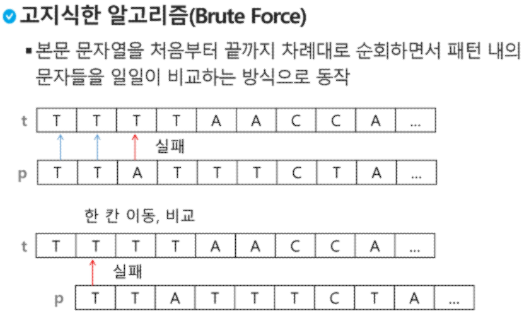

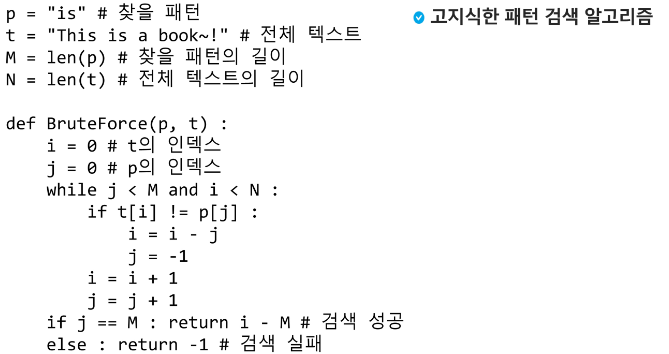

**고지식한 패턴 검색 알고리즘의 시간 복잡도**

- 최악의 경우 시간 복잡도는 텍스트의 모든 위치에서 패턴을 비교해야 하므로 O(MN)

- 길이가 10000인 문자열에서 길이 80인 패턴을 찾는다고 할 때, 최악의 경우 약 10000*80 =80000 번의 비교... ---> 횟수를 줄일 수 있는 방법?

### KMP 알고리즘

https://5-ssssseung.tistory.com/29

- 불일치 발생 텍스트 스트링의 앞 부분에 어떤 문자가 있는지를 미리 알고 있으므로, 불일치가 발생한 앞 부분에 대해 다시 비교x 매칭 수행

- 패턴을 전처리해 배열 next[M](불일치 발생시 이동할 다음 위치)을 구해 잘못된 시작을 최소화 함

--> 시간 복잡도: O(M+N)

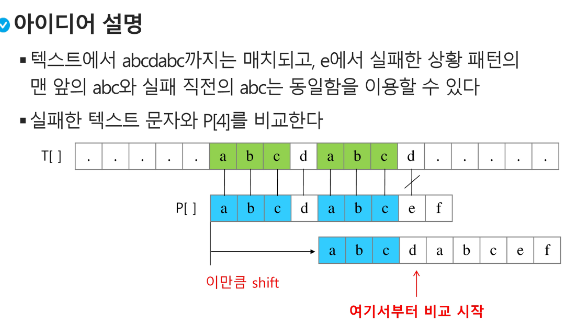


앞선 고지식한 패턴 검색 알고리즘처럼 한칸씩 옮겨서 검사하는 게 아니라

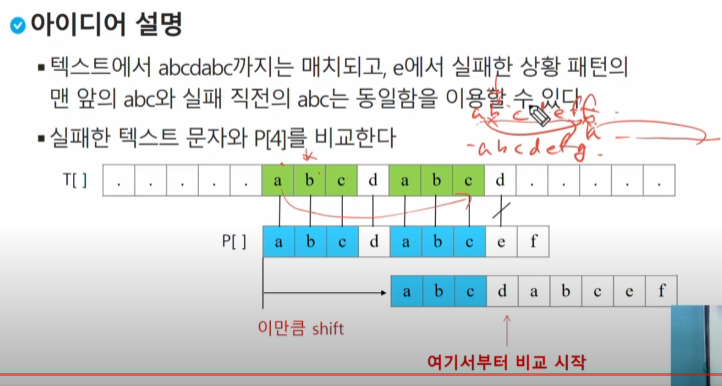

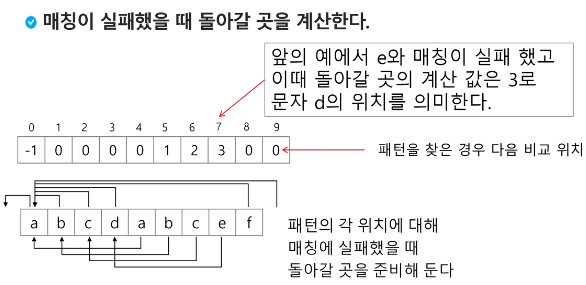



In [ ]:
##### KMP 알고리즘

def kmp(t,p):
    # 패턴이 있는지 찾고자 하는 대상문자열 길이
    N = len(t)
    # 패턴의 길이
    M = len(p)

    # lps : Longest proper prefix which is also suffix
    # prefix : 접두사, suffix : 접미사, proper : 적절한
    lps = [0] * (M+1)
    #preprocessing : 전처리
    lps[0] = -1
    # 사전작업 : 매칭이 실패했을 때 패턴의 어느 인덱스로 돌아가야 하는지 계산
    # 일치한 개수를 저장하는 변수
    j = 0
    for i in range(1,M):
        # 어느 위치로 돌아가야 하는지 계산 : 앞쪽에 얼마나 많은 패턴이 맞았는가?
        # p[i] 이전에 일치한 개수
        lps[i] = j
        # 앞서서 패턴이 일치 했으면....j 증가
        if p[i] == p[j]:
            j += 1
        else:
            j = 0
    lps[M] = j

    print(lps)
    # ===============================

    # 패턴매칭 시작
    # Search
    # 비교할 텍스트 위치
    i = 0
    # 비교할 패턴 시작위치
    j = 0
    while i < N and j <= M:
        # 첫 글자가 불일치 했거나 or 일치하면
        if j == -1 or t[i] == p[j]:
            i += 1
            j += 1
        # 불일치
        else:
            # shift 찾기
            j = lps[j]
        # 패턴을 찾을 경우
        if j == M:
            # 패턴의 인덱스 출력
            return i-M
    return -1
# 예제1
t1 = 'zzzabcdabcdabcdf'
p1 = 'abcdabcdf'
# arr = [0,a,b,c,d,a,b,c,d,f]
# [-1,0,0,0,0,1,2,3,4,0]
# arr[5]의 a는 arr[1]의 a와 같으므로 인덱스 1로 이동
# t의 idx가 7일때 패턴 나타남
print(kmp(t1,p1))
# [-1, 0, 0, 0, 0, 1, 2, 3, 4, 0]
# 7

# 예제2
t2 = 'abcde'
p2 = 'cdd'
print(kmp(t2,p2))
# 패턴 나타나지 않음
# [-1, 0, 0, 0]
# -1

https://hanco.tistory.com/1

https://mungto.tistory.com/124

### 보이어-무어 알고리즘

- 오른쪽--> 왼쪽 비교
- 대부분의 상용 소프트웨어에서 채택하고 있는 알고리즘
- 보이어-무어 알고리즘은 패턴에 오른쪽 끝에 있는 문자가 불일치하고 이 문자가 패턴 내에 존재하지 않는 경우, 이동거리는 패턴의 길이만큼이 됨.

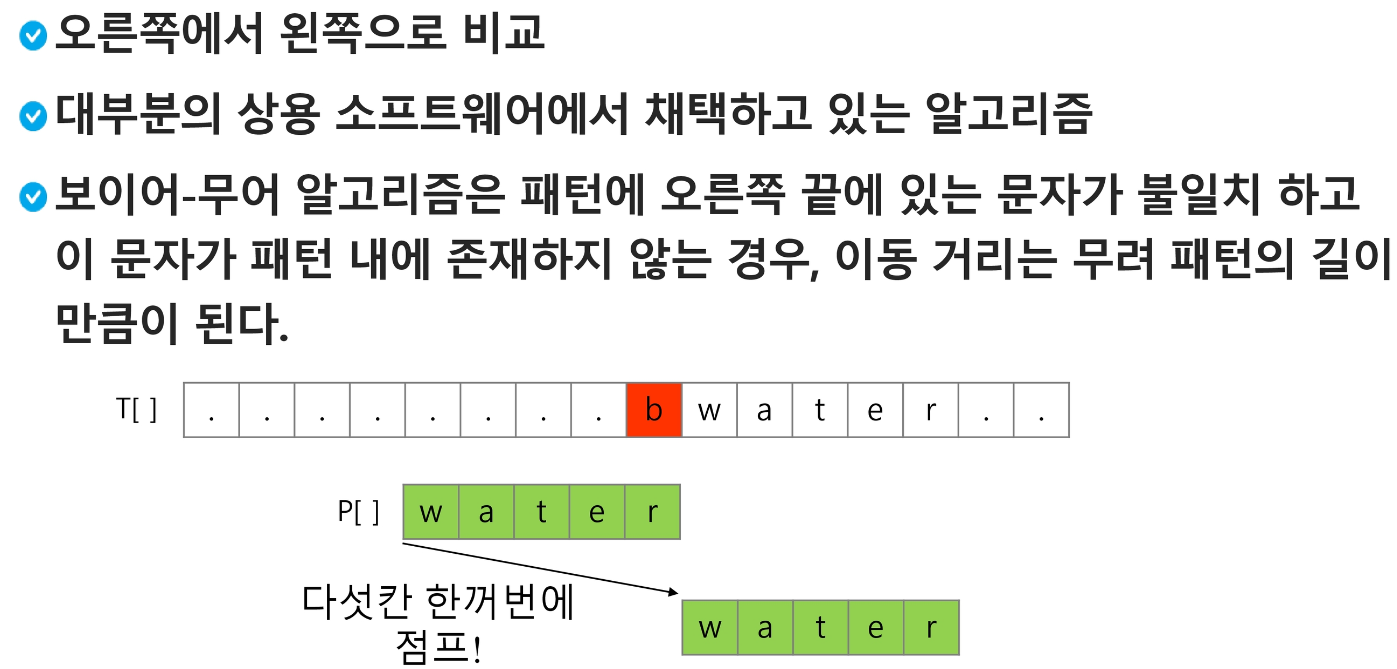

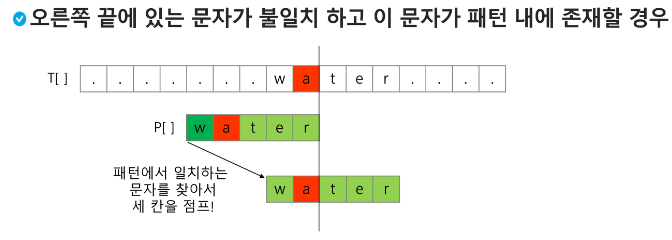

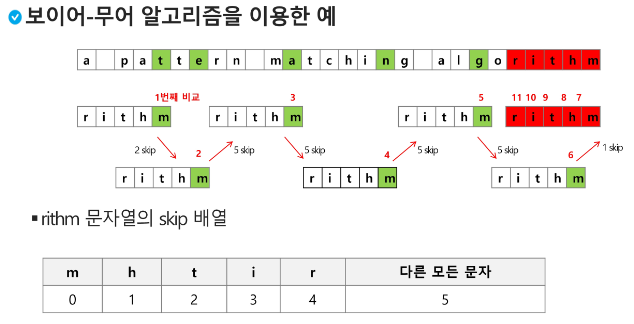

- 앞의 두 매칭 알고리즘들(고지식한패턴~, KMP)의 공통점
  :텍스트 문자열의 문자를 적어도 한번씩 훑는다

- 보이어-무어 알고리즘은 텍스트 문자를 다 보지 않아도 됨

- 발상의 전환: 패턴의 오른쪽부터 비교

- 최악의 경우 수행시간 O(mn)

- 입력에 따라 갈리겠지만 일반적으로 o(n)보다 시간이 덜 든다.

### 문자열 매칭 알고리즘 시간복잡도 비교

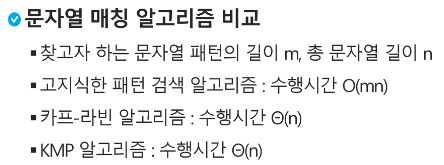

문자열 암호화~~

시저 암호

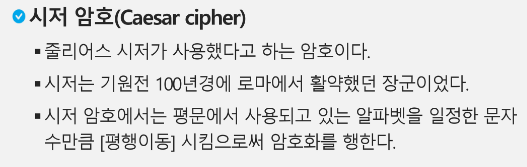

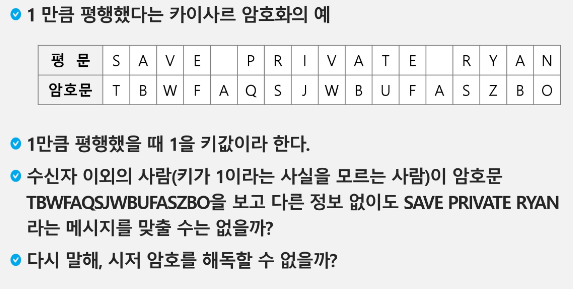

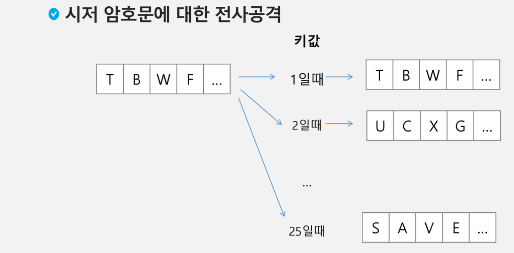

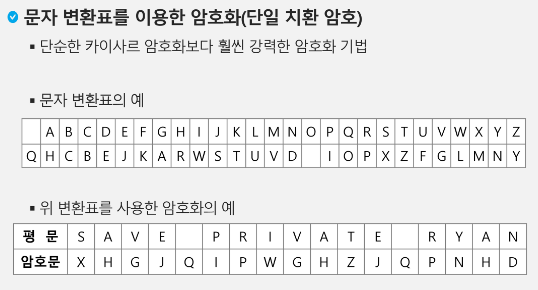

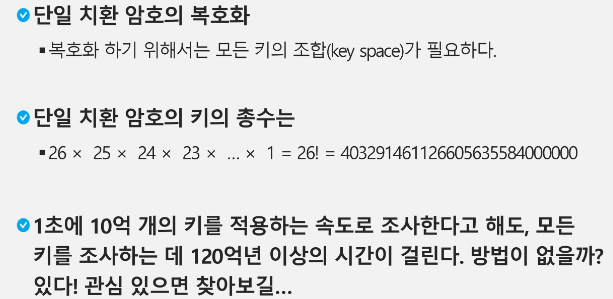

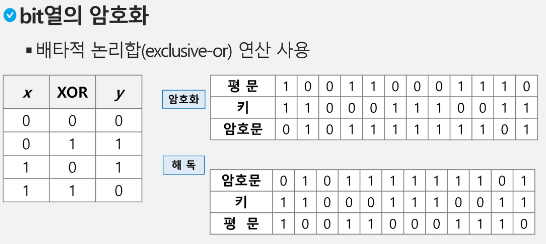

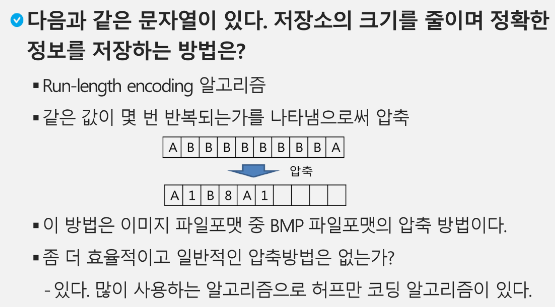



#### 숫자 관련된 개념들

In [ ]:

# 최대공약수 GCD: GREATEST COMMON DIVISOR
# 최소공배수 LCM: LEAST COMMON MULTIPLE

# 최대공약수
# 전제: a>b
def gcd(a, b):
    for i in range(b, 0, -1): # 제일 큰 수를 구하는거니까 b부터 0까지 -1씩.
        if a%b == 0 and b%i == 0:
            return b
        # 이 방법은 최악의 경우 1부터 b까지 모두 나눠봐야한다

# 유클리드 호제법
# a, b의 최대공약수 구하기
# a와 b, a를 b로 나눈 나머지 r이 있다고 했을 때, 다음이 성립함
# a와 b의 최대공약수는 b와 r의 최대공약수와 같다.
# 재귀적으로 (a,b) == (b,r)
# new_gcd(a,b) == new_gcd(b,r)

def new_gcd(a, b):
    # 종료조건이 있어야 함
    if b == 0: # b로 나눌 수 없을 때 종료
        return a 
    # 재귀 호출
    else:
        return new_gcd(b, a%b)
    

# 최소공배수
# a와 b의 최소공배수는 a와 b의 곱을 a와 b의 최대공약수로 나눈 것과 같다.

def lcm(a, b):
    return a*b // new_gcd(a, b)


In [ ]:
### 소수 prime num
# 1과 자기 자신만을 약수로 가지는 수

# 어떤 숫자 n이 소수인지 소수가 아닌지 구하는 방법?
# 1부터 n까지 나눠보고 나누어떨어진 횟수가 2를 초과하면 소수가 아님
# --> 2부터 n-1까지 다 나눠보고 나누어떨어진 적이 한번이라도 있으면 소수가 아니다.

prime = []
for i in range(2, 1000):
    # i가 소수인지 아닌지 판별
    # 소수이면 prime에 추가
    for j in range(2, i):
        if i % j == 0:
            break
        else:
            prime.append(i)

# 에라토스테네스의 체
'''
2부터 소수를 구하고자 하는 구간의 모든 수를 나열. 소수를 제외하고 각 소수의 곱을 제외
처음 시작할 때는 2부터 모든 수가 소수라고 생각. 소수인 수들은 자기자신을 제외하고 자신의 배수를 모두 제외
다음 수로 이동(제외되지 않은 수)
'''

n = 1000 # 2부터 1000까지의 모든 수에 대해 소수를 판별

is_prime = [True for i in range(n+1)] # is_prime[i] =>d 숫자 i가 소수인가? 소수면 True, 아니면 False
'''
for i in range(2, n+1):
    if is_prime[i]: # is_prime[i] == True일때
        # i 를 제외한 모든 i의 배수를 소수가 아니라고 체크
        j =2
        while j<n:
            is_prime[i*j] == False
            j += 1
'''        
# 여기서 또 최적화가 됩니다 --> 오
# n의 제곱근까지만 약수를 구하면 뒤는 반복이다. 

for i in range(2, int(n**0.5) +1): # n의 제곱근까지만 검색
    if is_prime[i]: # is_prime[i] == True일때
        # i 를 제외한 모든 i의 배수를 소수가 아니라고 체크
        j =2
        while j<n:
            is_prime[i*j] = False
            j += 1
